### Basic cell averaging methods check

In [1]:
import underworld as uw
import underworld.visualisation as vis
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
uw.utils.matplotlib_inline()


## Set up the mesh

Initialise a Q1 finite element mesh and mesh variables

In [2]:
deformedmesh = True

elementType = "Q1"
resX = 2
resY = 1
mesh = uw.mesh.FeMesh_Cartesian( elementType = (elementType), 
                                 elementRes  = (resX, resY), 
                                 minCoord    = (-1., -1.), 
                                 maxCoord    = (1., 0.)) 



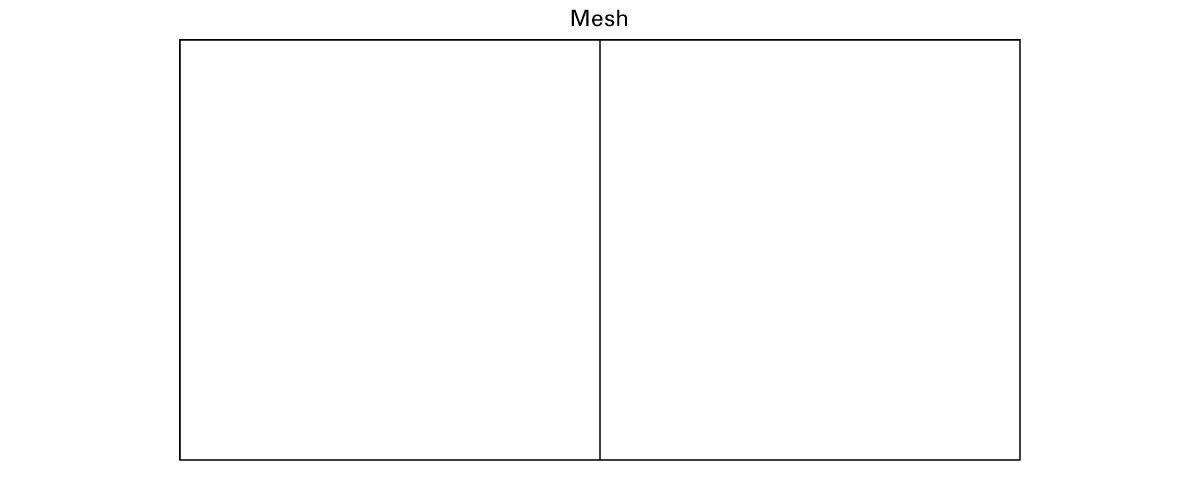

In [3]:
figMaterial = vis.Figure( figsize=(1200,500), title="Mesh" )
figMaterial.append( vis.objects.Mesh(mesh))
figMaterial.show()

In [4]:
GPC = 4
swarm         = uw.swarm.Swarm( mesh=mesh )
swarmLayout = uw.swarm.layouts.PerCellGaussLayout(swarm=swarm,gaussPointCount=GPC)
swarm.populate_using_layout( layout=swarmLayout )

In [5]:
materialIndex        = swarm.add_variable( dataType="int",    count=1 )
hydraulicDiffusivity = swarm.add_variable( dataType="double", count=1 )

In [6]:
materialIndex.data[:] = 1.

hydraulicDiffusivity.data[:,0] = np.random.rand(materialIndex.data[:].shape[0])
# hydraulicDiffusivity.data[:] 

initialHD = hydraulicDiffusivity.data[:,0].copy()


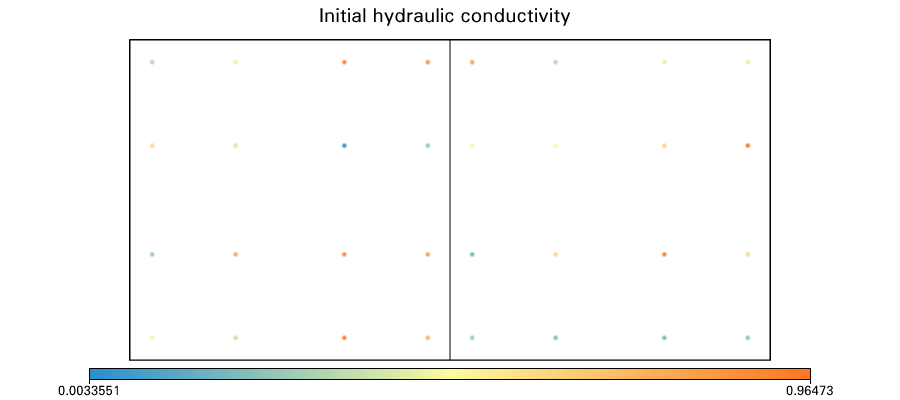

In [7]:
figMaterial = vis.Figure( figsize=(900,400), title="Initial hydraulic conductivity" )
figMaterial.append( vis.objects.Points(swarm, hydraulicDiffusivity, pointSize=6.0) )
figMaterial.append( vis.objects.Mesh(mesh))
# figMaterial.append( vis.objects.Mesh(mesh))
figMaterial.show()

In [8]:
import timeit

In [9]:
### numpy array manipulation
def test0():
    hydraulicDiffusivity.data[:,0] = np.repeat((np.mean((np.split(hydraulicDiffusivity.data[:,0], np.unique(swarm.owningCell.data[:,0], return_index = True)[1])[1:]), axis=1)), GPC**mesh.dim)

### for loop over each cell
def test1(): 
    for i in np.unique(swarm.owningCell.data[:]): 
        hydraulicDiffusivity.data[swarm.owningCell.data[:] == i] = np.mean(hydraulicDiffusivity.data[swarm.owningCell.data[:] == i])

### list comprehension of for loop    
def test2():
    hydraulicDiffusivity.data[:,0] = np.concatenate([np.repeat(np.mean(hydraulicDiffusivity.data[swarm.owningCell.data[:] == i]), swarm.owningCell.data[swarm.owningCell.data ==i].shape) for i in np.unique(swarm.owningCell.data[:])])

    

36.1 µs ± 633 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)



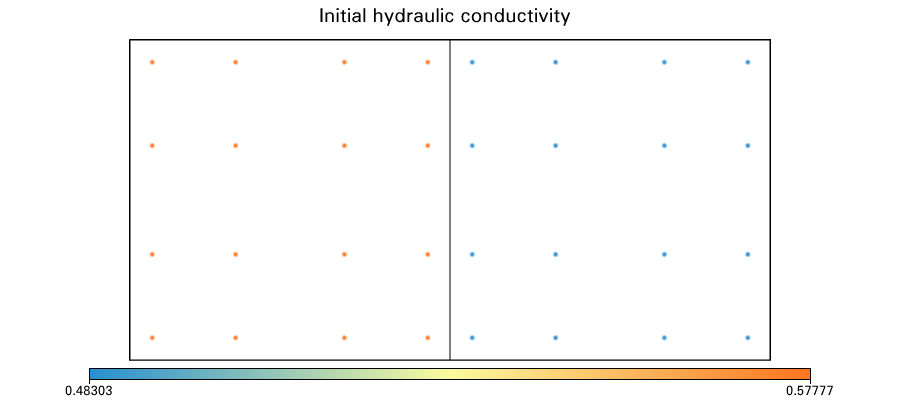

In [10]:
hydraulicDiffusivity.data[:,0] = initialHD

%timeit test0()

figMaterial.show()



39.9 µs ± 508 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)



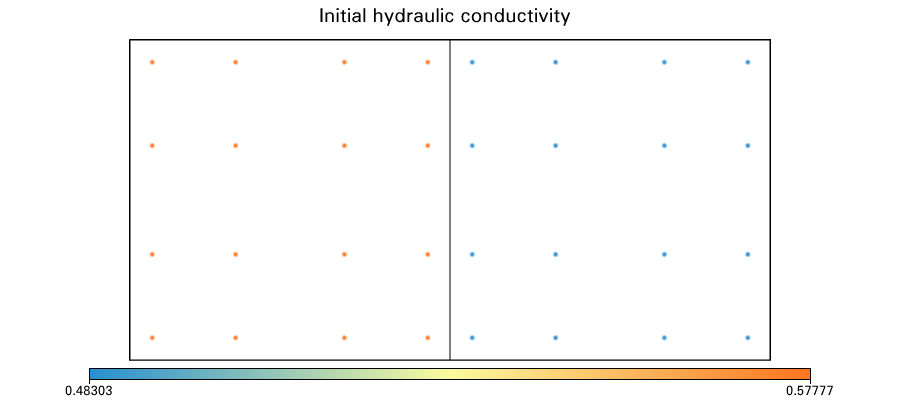

In [11]:
hydraulicDiffusivity.data[:,0] = initialHD

%timeit test1()

figMaterial.show()

52.4 µs ± 713 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)



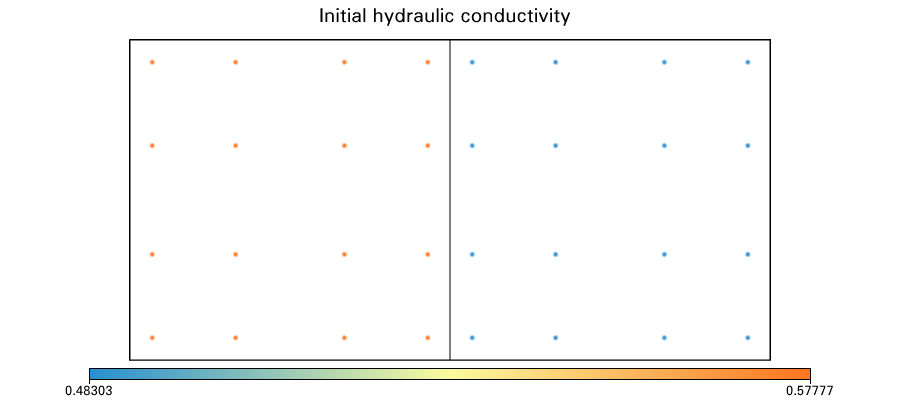

In [12]:
hydraulicDiffusivity.data[:,0] = initialHD

%timeit test2()

figMaterial.show()